In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("data.xlsx")

In [3]:
bulan_mapping = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

# Ganti nama bulan Indonesia ke Inggris
for indo, eng in bulan_mapping.items():
    data['Tahun'] = data['Tahun'].str.replace(indo, eng)

# Konversi ke datetime
data['Tahun'] = pd.to_datetime(data['Tahun'], format='%Y %B')

In [4]:
data.head()

,Tahun,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
0,2025-04-01,"16,787.00","11,789.46","22,532.36","20,387.45","12,847.38","3,884.54","2,163.65","10,794.05","12,147.77",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"58,21"
1,2025-03-01,"16,588.00","11,029.63","21,416.78","18,771.10","12,406.43","3,745.33","2,133.52","10,481.14","11,640.30",...,"21,794.34",575.05,"18,153.10","3,024.96",41.23,"18,919.98","1,741.66","13,477.24","3,701.07","71,48"
2,2025-02-01,"16,431.00","11,007.58","20,813.16","18,330.00","12,256.92","3,700.68","2,113.35","10,347.43","11,459.36",...,"20,816.24",564.32,"17,630.28","2,579.98",41.67,"18,849.00","1,466.93","13,932.19","3,449.88","69,76"
3,2025-01-01,"16,259.00","10,523.63","20,245.72","17,938.99","12,045.96","3,701.14","2,086.94","10,117.19","11,276.50",...,"20,371.43",547.31,"17,105.37","2,687.13",31.62,"17,935.92","1,644.42","12,974.15","3,317.34","72,53"
4,2024-12-01,"16,162.00","10,236.25","20,332.61","17,920.95","11,919.34","3,616.48","2,082.02","10,081.88","11,225.18",...,"21,921.95",582.06,"17,610.97","3,696.88",32.04,"21,221.23","2,304.76","15,004.75","3,911.73","71,72"


In [5]:
data.isnull().sum()

Tahun                          0
USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                            0
CAD                            0
Data Inflansi                  0
BI Rate                        2
Total Ekspor                   1
Ekspor_MIGAS                   1
Ekspor_NON_MIGAS               1
Ekspor_Agriculture             1
Ekspor_Industry                1
Ekspor_Mining                  1
Ekspor_Lain                    1
Total_Import                   1
Import_Consumption_Goods       1
Import_Raw_Material_Support    1
Import_Capital_Goods           1
Minyak WTI                     1
dtype: int64

In [6]:
data.dtypes

Tahun                          datetime64[ns]
USD                                    object
JPY                                    object
GBP                                    object
CHF                                    object
SGD                                    object
MYR                                    object
HKD                                    object
AUD                                    object
CAD                                    object
Data Inflansi                          object
BI Rate                                object
Total Ekspor                           object
Ekspor_MIGAS                           object
Ekspor_NON_MIGAS                       object
Ekspor_Agriculture                    float64
Ekspor_Industry                        object
Ekspor_Mining                          object
Ekspor_Lain                           float64
Total_Import                           object
Import_Consumption_Goods               object
Import_Raw_Material_Support       

In [7]:
percent_cols = ['Data Inflansi', 'BI Rate']

for col in percent_cols:
    data[col] = data[col].str.replace('%', '', regex=False).astype(float) / 100


In [8]:
for col in data.columns:
    if col not in percent_cols and data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '', regex=False)  # If numbers have commas
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to float safely



In [9]:
data.dtypes

Tahun                          datetime64[ns]
USD                                   float64
JPY                                   float64
GBP                                   float64
CHF                                   float64
SGD                                   float64
MYR                                   float64
HKD                                   float64
AUD                                   float64
CAD                                   float64
Data Inflansi                         float64
BI Rate                               float64
Total Ekspor                          float64
Ekspor_MIGAS                          float64
Ekspor_NON_MIGAS                      float64
Ekspor_Agriculture                    float64
Ekspor_Industry                       float64
Ekspor_Mining                         float64
Ekspor_Lain                           float64
Total_Import                          float64
Import_Consumption_Goods              float64
Import_Raw_Material_Support       

In [10]:
data.head()

,Tahun,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
0,2025-04-01,16787.0,11789.46,22532.36,20387.45,12847.38,3884.54,2163.65,10794.05,12147.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5821.0
1,2025-03-01,16588.0,11029.63,21416.78,18771.10,12406.43,3745.33,2133.52,10481.14,11640.30,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,7148.0
2,2025-02-01,16431.0,11007.58,20813.16,18330.00,12256.92,3700.68,2113.35,10347.43,11459.36,...,20816.24,564.32,17630.28,2579.98,41.67,18849.00,1466.93,13932.19,3449.88,6976.0
3,2025-01-01,16259.0,10523.63,20245.72,17938.99,12045.96,3701.14,2086.94,10117.19,11276.50,...,20371.43,547.31,17105.37,2687.13,31.62,17935.92,1644.42,12974.15,3317.34,7253.0
4,2024-12-01,16162.0,10236.25,20332.61,17920.95,11919.34,3616.48,2082.02,10081.88,11225.18,...,21921.95,582.06,17610.97,3696.88,32.04,21221.23,2304.76,15004.75,3911.73,7172.0


In [11]:
# Forward fill untuk kolom tertentu
data['BI Rate'] = data['BI Rate'].fillna(method='ffill')
data['Minyak WTI'] = data['Minyak WTI'].fillna(method='ffill')

# Backward fill untuk banyak kolom
bfill_cols = [
    'Total Ekspor', 'Ekspor_MIGAS', 'Ekspor_NON_MIGAS',
    'Ekspor_Agriculture', 'Ekspor_Industry', 'Ekspor_Mining', 'Ekspor_Lain',
    'Total_Import', 'Import_Consumption_Goods',
    'Import_Raw_Material_Support', 'Import_Capital_Goods'
]
data[bfill_cols] = data[bfill_cols].fillna(method='bfill')


/tmp/ipykernel_9095/546988704.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['BI Rate'] = data['BI Rate'].fillna(method='ffill')
/tmp/ipykernel_9095/546988704.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Minyak WTI'] = data['Minyak WTI'].fillna(method='ffill')
/tmp/ipykernel_9095/546988704.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[bfill_cols] = data[bfill_cols].fillna(method='bfill')


In [12]:
print(data.isnull().sum())

Tahun                          0
USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                            0
CAD                            0
Data Inflansi                  0
BI Rate                        0
Total Ekspor                   0
Ekspor_MIGAS                   0
Ekspor_NON_MIGAS               0
Ekspor_Agriculture             0
Ekspor_Industry                0
Ekspor_Mining                  0
Ekspor_Lain                    0
Total_Import                   0
Import_Consumption_Goods       0
Import_Raw_Material_Support    0
Import_Capital_Goods           0
Minyak WTI                     0
dtype: int64


In [13]:
data.fillna(method='ffill').fillna(method='bfill')

/tmp/ipykernel_9095/3883722823.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill').fillna(method='bfill')


,Tahun,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
0,2025-04-01,16787.0,11789.46,22532.36,20387.45,12847.38,3884.54,2163.65,10794.05,12147.77,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,5821.0
1,2025-03-01,16588.0,11029.63,21416.78,18771.10,12406.43,3745.33,2133.52,10481.14,11640.30,...,21794.34,575.05,18153.10,3024.96,41.23,18919.98,1741.66,13477.24,3701.07,7148.0
2,2025-02-01,16431.0,11007.58,20813.16,18330.00,12256.92,3700.68,2113.35,10347.43,11459.36,...,20816.24,564.32,17630.28,2579.98,41.67,18849.00,1466.93,13932.19,3449.88,6976.0
3,2025-01-01,16259.0,10523.63,20245.72,17938.99,12045.96,3701.14,2086.94,10117.19,11276.50,...,20371.43,547.31,17105.37,2687.13,31.62,17935.92,1644.42,12974.15,3317.34,7253.0
4,2024-12-01,16162.0,10236.25,20332.61,17920.95,11919.34,3616.48,2082.02,10081.88,11225.18,...,21921.95,582.06,17610.97,3696.88,32.04,21221.23,2304.76,15004.75,3911.73,7172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2016-05-01,13615.0,12256.39,19998.40,13726.91,9873.82,3310.65,1752.57,9852.51,10448.97,...,10559.45,220.47,9071.60,1230.05,37.33,11140.68,1001.52,8504.45,1638.22,4910.0
108,2016-04-01,13204.0,12301.68,19335.96,13693.58,9832.09,3394.79,1702.07,10090.50,10533.30,...,10798.01,213.08,9373.81,1172.25,38.86,10813.62,1001.52,8173.29,1764.93,4592.0
109,2016-03-01,13276.0,11818.24,19057.71,13746.86,9830.09,3389.34,1712.12,10162.13,10221.75,...,10572.81,224.51,8944.60,1369.86,33.84,11301.71,1001.52,8620.92,1690.68,3834.0
110,2016-02-01,13395.0,11814.79,18562.80,13446.12,9492.61,3164.06,1722.69,9540.61,9899.14,...,10203.45,214.70,8683.94,1279.55,25.26,10175.63,1001.52,7384.10,1790.02,3375.0


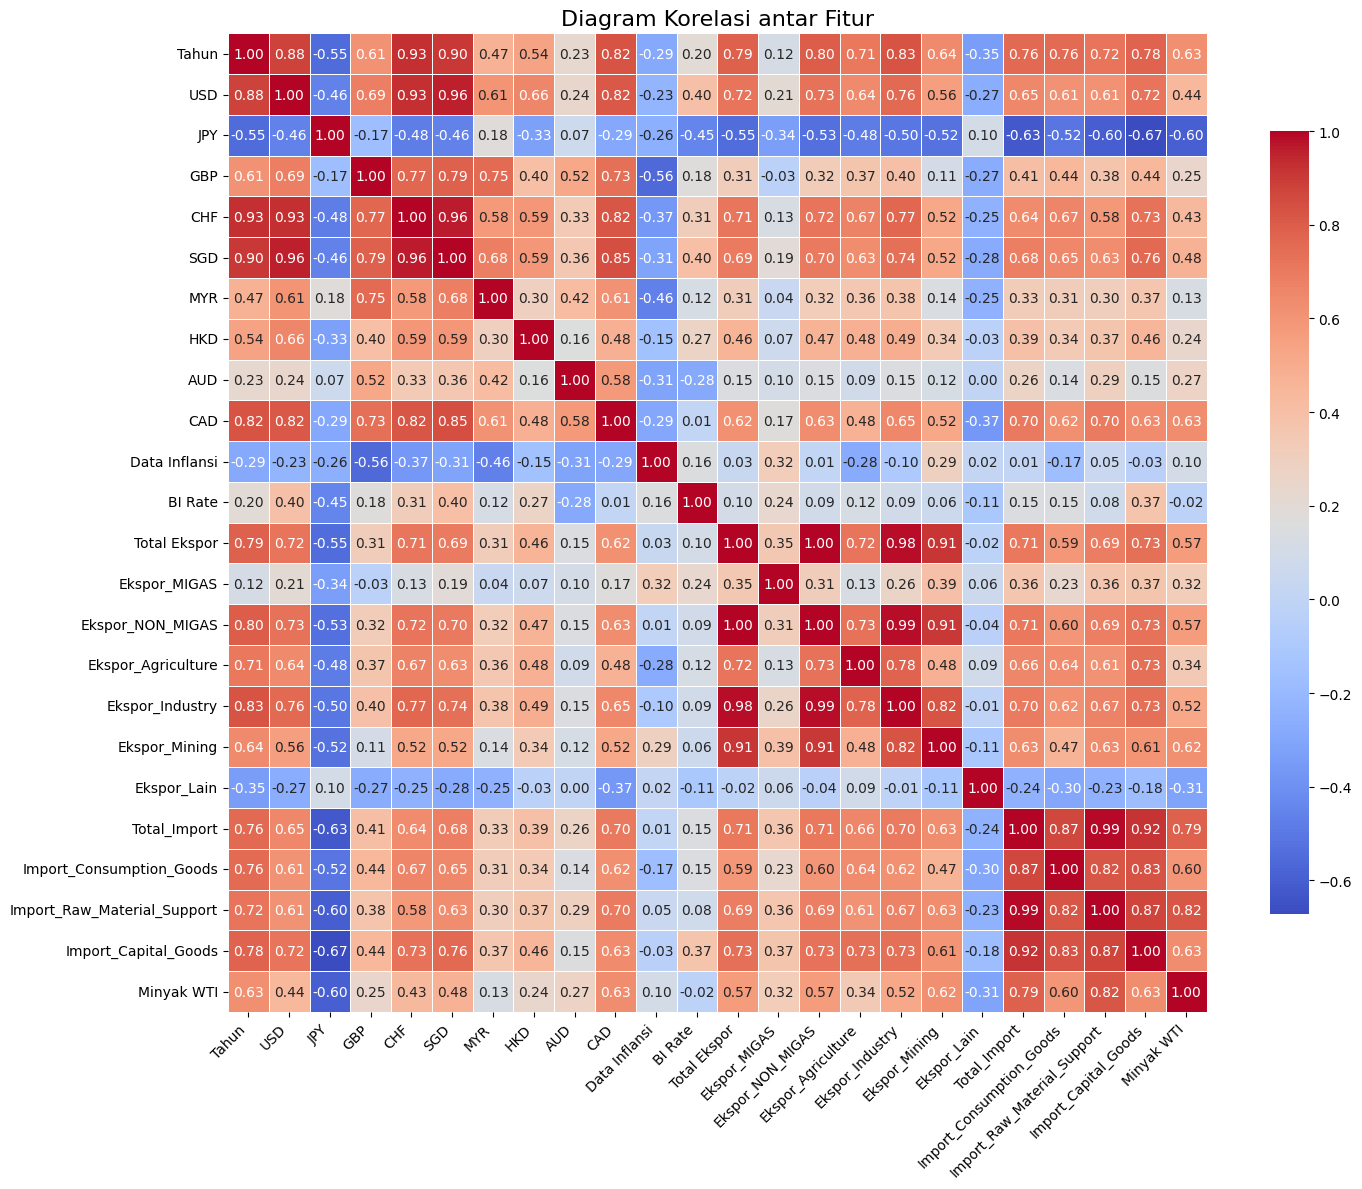

In [14]:
import seaborn as sns
correlation_matrix = data.corr()

# Set ukuran figure
plt.figure(figsize=(15, 12))

# Buat heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

# Tambahkan judul
plt.title("Diagram Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Plot semua kolom
plt.figure(figsize=(18, 10))
plt.plot(data_line.index, data_line["USD"], label="USD")

plt.title('Line Chart Seluruh Fitur')
plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


NameError: name 'data_line' is not defined

<Figure size 1800x1000 with 0 Axes>

In [ ]:
missing = data.isnull().sum()
missing[missing > 0]

In [16]:
print(data.columns)


Index(['Tahun', 'USD', 'JPY', 'GBP', 'CHF', 'SGD', 'MYR', 'HKD', 'AUD', 'CAD',
       'Data Inflansi', 'BI Rate', 'Total Ekspor', 'Ekspor_MIGAS',
       'Ekspor_NON_MIGAS', 'Ekspor_Agriculture', 'Ekspor_Industry',
       'Ekspor_Mining', 'Ekspor_Lain', 'Total_Import',
       'Import_Consumption_Goods', 'Import_Raw_Material_Support',
       'Import_Capital_Goods', 'Minyak WTI'],
      dtype='object')


In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt


In [18]:
# Step 1: Pastikan index datetime
data['Tahun'] = pd.to_datetime(data['Tahun'], format='%Y %M %d')
data.set_index('Tahun', inplace=True)
data = data.asfreq('MS')  # Anggap data bulanan

In [19]:
data.head()

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
Tahun,,,,,,,,,,,,,,,,,,,,,
2016-01-01,13846.0,11675.04,19875.26,13645.45,9707.31,3329.58,1776.71,9826.51,9863.94,0.0414,...,9473.86,249.40,7890.50,1313.28,20.68,10467.00,1155.63,7505.17,1806.20,3375.0
2016-02-01,13395.0,11814.79,18562.80,13446.12,9492.61,3164.06,1722.69,9540.61,9899.14,0.0442,...,10203.45,214.70,8683.94,1279.55,25.26,10175.63,1001.52,7384.10,1790.02,3375.0
2016-03-01,13276.0,11818.24,19057.71,13746.86,9830.09,3389.34,1712.12,10162.13,10221.75,0.0445,...,10572.81,224.51,8944.60,1369.86,33.84,11301.71,1001.52,8620.92,1690.68,3834.0
2016-04-01,13204.0,12301.68,19335.96,13693.58,9832.09,3394.79,1702.07,10090.50,10533.30,0.0360,...,10798.01,213.08,9373.81,1172.25,38.86,10813.62,1001.52,8173.29,1764.93,4592.0
2016-05-01,13615.0,12256.39,19998.40,13726.91,9873.82,3310.65,1752.57,9852.51,10448.97,0.0333,...,10559.45,220.47,9071.60,1230.05,37.33,11140.68,1001.52,8504.45,1638.22,4910.0


In [20]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    # print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    # print(out.to_string())          # .to_string() removes the line "dtype: float64"
    return [result[1], result[1] <= 0.05]

In [21]:
data_test = data.copy()

In [22]:
for col in data.columns:
    print(f"{col}: {adf_test(data_test[col])}")

USD: [0.5935112784217265, False]
JPY: [0.4061252015564436, False]
GBP: [0.8553918396706535, False]
CHF: [0.9915490860066283, False]
SGD: [0.9827163655192511, False]
MYR: [0.39508925324937627, False]
HKD: [3.531553287962974e-10, True]
AUD: [0.014319183187568535, True]
CAD: [0.16032492556412425, False]
Data Inflansi: [0.08100036694294127, False]
BI Rate: [0.3551070320593237, False]
Total Ekspor: [0.432766477767083, False]
Ekspor_MIGAS: [0.0002995460177828785, True]
Ekspor_NON_MIGAS: [0.4250735468976108, False]
Ekspor_Agriculture: [0.32306607871253573, False]
Ekspor_Industry: [0.4808101085430225, False]
Ekspor_Mining: [0.2527501934470998, False]
Ekspor_Lain: [0.012597162113010395, True]
Total_Import: [0.5739202401181899, False]
Import_Consumption_Goods: [0.7154374254915974, False]
Import_Raw_Material_Support: [0.47665291889095956, False]
Import_Capital_Goods: [0.9343228109663106, False]
Minyak WTI: [0.18268988396909308, False]


In [23]:
for col in data_test.columns:
    if (not (adf_test(data_test[col])[1])):
        data_test[col] = data_test[col].diff().dropna()
    print(f"{col}: {adf_test(data_test[col])}")

USD: [2.3122542144462194e-12, True]
JPY: [1.3253439015970281e-20, True]
GBP: [1.0007541091887654e-11, True]
CHF: [3.6081937817131796e-11, True]
SGD: [1.4249235169160437e-11, True]
MYR: [2.598449434744491e-22, True]
HKD: [3.531553287962974e-10, True]
AUD: [0.014319183187568535, True]
CAD: [5.64381041896908e-12, True]
Data Inflansi: [0.0008313439779231121, True]
BI Rate: [1.7536470161817876e-06, True]
Total Ekspor: [0.0001177560176183656, True]
Ekspor_MIGAS: [0.0002995460177828785, True]
Ekspor_NON_MIGAS: [1.7450893632289304e-27, True]
Ekspor_Agriculture: [0.0675942899155046, False]
Ekspor_Industry: [1.268312848410297e-29, True]
Ekspor_Mining: [2.2728058336172884e-16, True]
Ekspor_Lain: [0.012597162113010395, True]
Total_Import: [0.03776795742890595, True]
Import_Consumption_Goods: [2.982103987161748e-06, True]
Import_Raw_Material_Support: [0.03808730038805368, True]
Import_Capital_Goods: [0.021470621491110113, True]
Minyak WTI: [1.810215820313352e-15, True]


In [24]:
for col in data_test.columns:
    if (not (adf_test(data_test[col])[1])):
        print(f"{col}: {adf_test(data_test[col])}")

Ekspor_Agriculture: [0.0675942899155046, False]


In [25]:
data_test.drop(columns=["Ekspor_Agriculture"],inplace=True)

In [26]:
data_test = data_test.dropna()

In [27]:
test_obs = 12
train = data[:-test_obs]
test = data[-test_obs:]

In [28]:
print(train.isna().sum())
print(np.isinf(train).sum())  # Harusnya semua nol
print(train.describe())  # Lihat apakah ada kolom dengan std = 0

USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                            0
CAD                            0
Data Inflansi                  0
BI Rate                        0
Total Ekspor                   0
Ekspor_MIGAS                   0
Ekspor_NON_MIGAS               0
Ekspor_Industry                0
Ekspor_Mining                  0
Ekspor_Lain                    0
Total_Import                   0
Import_Consumption_Goods       0
Import_Raw_Material_Support    0
Import_Capital_Goods           0
Minyak WTI                     0
dtype: int64
USD                            0
JPY                            0
GBP                            0
CHF                            0
SGD                            0
MYR                            0
HKD                            0
AUD                           

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = pd.DataFrame(
    scaler.fit_transform(train),
    columns=train.columns,  # Keep original column names
    index=train.index       # Keep original index (dates)
)

train.head()

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_MIGAS,Ekspor_NON_MIGAS,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
Tahun,,,,,,,,,,,,,,,,,,,,,
2016-02-01,-1.332719,0.405709,-2.260841,-0.567816,-1.084219,-2.026435,-0.833720,-1.736506,0.058528,0.852228,...,-0.794045,0.329329,0.450892,-0.124287,-1.000327,-0.159135,-0.579388,-0.106967,-0.060897,-0.075813
2016-03-01,-0.401753,0.042319,0.840824,0.607590,1.438206,2.736330,-0.902036,-0.229398,1.208127,0.121367,...,-0.059564,0.144192,0.122595,0.131530,-0.143880,0.473935,-0.010518,0.735471,-0.249015,0.639217
2016-04-01,-0.269960,1.322023,0.469009,-0.224528,-0.094307,0.057213,-0.966991,-0.403092,1.163889,-2.451262,...,-0.059564,0.070102,0.226454,-0.462270,0.357211,-0.246996,-0.010518,-0.309566,0.143666,1.104999
2016-05-01,1.084428,-0.087627,1.128325,-0.020953,0.087184,-1.034640,-0.640600,-0.980188,-0.419574,-0.755665,...,-0.059564,-0.168243,-0.224244,0.064482,0.204488,0.117072,-0.010518,0.173598,-0.310929,0.419567
2016-06-01,-1.287853,1.565145,-3.983208,-0.739542,-0.575102,-0.404560,-0.988319,-1.067580,-1.133029,0.384477,...,-0.362286,0.704356,0.635498,0.594760,1.122822,0.397321,0.517268,0.252786,0.765748,-0.195763


In [30]:
for i in range(1,10):
    try:
        model = VAR(train)
        results = model.fit(i)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        print()
    except:
        break

Order = 1
AIC:  -33.44476825544214
BIC:  -20.09789535536755

Order = 2
AIC:  -35.11884070255249
BIC:  -8.840862674528275

Order = 3
AIC:  -46.29941694127223
BIC:  -6.925987418109827

Order = 4


In [31]:

lag_order = model.select_order()
optimal_lag = lag_order.aic
print(optimal_lag)
print(lag_order.summary())

3
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0      -31.50     -30.91*   2.090e-14     -31.26*
1      -34.00      -20.48   2.112e-15      -28.54
2      -35.18      -8.737   3.018e-15      -24.49
3     -46.30*      -6.926  1.125e-17*      -30.38
-------------------------------------------------


In [32]:
result = model.fit(optimal_lag)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 03, Jun, 2025
Time:                     20:51:22
--------------------------------------------------------------------
No. of Equations:         22.0000    BIC:                   -6.92599
Nobs:                     96.0000    HQIC:                  -30.3840
Log likelihood:           699.574    FPE:                1.12546e-17
AIC:                     -46.2994    Det(Omega_mle):     9.84397e-23
--------------------------------------------------------------------
Results for equation USD
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                  0.016162         0.085295            0.189           0.850
L1.USD                                -0.116327         0.388374           -0.300           

In [33]:
lagged_Values = train.values[-optimal_lag:]
pred = result.forecast(y=lagged_Values, steps=12) 

In [34]:
idx = pd.date_range('2016-01-01', periods=12, freq='MS')

In [35]:
df_forecast=pd.DataFrame(data=pred, index=idx)

In [36]:
df_forecast.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
2016-01-01,-0.253778,0.857794,0.800614,0.677026,0.475649,0.526177,1.077637,1.117370,-0.500211,-1.116502,...,1.299558,-0.163093,-0.383458,0.651692,-1.294231,0.886792,1.180527,0.757784,0.464209,-0.413144
2016-02-01,-3.281884,-2.248537,-1.104482,-2.315062,-2.609872,-1.814811,-1.335553,0.589567,-1.367088,0.379924,...,-0.274975,-0.144471,-0.165413,0.110731,-2.661955,-0.116257,0.718396,0.003517,-0.578544,1.481804
2016-03-01,0.909147,0.894078,-0.262237,0.446492,0.506700,0.281326,-1.507420,0.046680,0.666668,-0.203400,...,-0.040539,0.422854,0.704267,-0.753723,-1.619184,-1.026232,-1.486984,-1.024674,-0.337235,0.751742
2016-04-01,1.346179,1.182807,1.159436,1.221497,1.072750,0.962002,0.887363,0.519953,1.006263,-0.309808,...,-0.466397,-0.283528,-0.345469,-0.034756,-1.044380,0.077914,-0.809882,0.332317,-0.493679,-0.511768
2016-05-01,0.805835,-0.801072,-0.868829,-0.635383,-0.438421,-0.553532,0.113388,-0.093825,-0.270161,1.309938,...,-0.206104,1.282532,1.024283,1.615444,-1.322187,0.818063,1.557442,0.724639,0.565492,-0.772009


In [46]:



def invert_differencing(last_observation, forecast_df, diff_level):
    """Kembalikan hasil prediksi differencing ke skala asli"""
    inverted = forecast_df.copy()
    for col in forecast_df.columns:
        level = diff_level[col]
        if level == 0:
            continue
        inverted[col] = np.cumsum(inverted[col]) + last_observation[col]
    return inverted

In [47]:
# Ambil list dari key var_dict sesuai urutan
new_columns = list(var_dict.keys())

# Ubah nama kolom df_forecast
df_forecast.columns = new_columns

In [48]:
for col in var_dict:
    print(col)

for col in df_forecast:
    print(col)

USD
JPY
GBP
CHF
SGD
MYR
HKD
AUD
CAD
Data Inflansi
BI Rate
Total Ekspor
Ekspor_MIGAS
Ekspor_NON_MIGAS
Ekspor_Industry
Ekspor_Mining
Ekspor_Lain
Total_Import
Import_Consumption_Goods
Import_Raw_Material_Support
Import_Capital_Goods
Minyak WTI
USD
JPY
GBP
CHF
SGD
MYR
HKD
AUD
CAD
Data Inflansi
BI Rate
Total Ekspor
Ekspor_MIGAS
Ekspor_NON_MIGAS
Ekspor_Industry
Ekspor_Mining
Ekspor_Lain
Total_Import
Import_Consumption_Goods
Import_Raw_Material_Support
Import_Capital_Goods
Minyak WTI


In [49]:
forecast_original = pd.DataFrame(
    scaler.inverse_transform(df_forecast),  # Revert scaling
    columns=train.columns,                # Keep column names
    index=pd.date_range(                   # Create new future index
        start=train.index[-1],            # Start from last date
        periods=len(df_forecast) + 1,      # Number of forecast steps (+1 for inclusive end)
        freq='M'                           # Monthly frequency (adjust as needed)
    )[1:]                                  # Exclude the start date
)

/tmp/ipykernel_9095/2729670086.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(                   # Create new future index


In [50]:
var_dict = {
    'USD': 1,
    'JPY': 1,
    'GBP': 1,
    'CHF': 1,
    'SGD': 1,
    'MYR': 1,
    'HKD': 0,
    'AUD': 0,
    'CAD': 1,
    'Data Inflansi': 1,
    'BI Rate': 1,
    'Total Ekspor': 1,
    'Ekspor_MIGAS': 0,
    'Ekspor_NON_MIGAS': 1,
    'Ekspor_Industry': 1,
    'Ekspor_Mining': 1,
    'Ekspor_Lain': 0,
    'Total_Import': 1,
    'Import_Consumption_Goods': 1,
    'Import_Raw_Material_Support': 1,
    'Import_Capital_Goods': 1,
    'Minyak WTI': 1
}
inverted = invert_differencing(data.iloc[-12], forecast_original, var_dict)

In [52]:
inverted

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_MIGAS,Ekspor_NON_MIGAS,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
2024-05-31,16186.770595,10662.537255,21127.439207,18190.741543,12149.568152,3496.879915,2018.420347,10717.527011,11742.160062,0.024466,...,1472.504279,20677.900699,15732.176947,4516.525396,22.315626,21449.970751,2056.150602,15430.035017,3724.710798,7482.456569
2024-06-30,15040.661756,9806.735319,20488.800401,17248.055399,11600.889939,3348.724350,1645.044962,10499.865017,11420.942992,0.025650,...,1202.350429,20485.593968,15525.440768,4596.750824,8.613577,21254.604963,2253.617279,15487.049494,3479.697924,8482.339472
2024-07-31,15389.153521,10129.662038,20340.946385,17480.257271,11734.455555,3372.563502,1618.453366,10275.982434,11608.183309,0.024839,...,1242.574267,21397.161083,16730.074190,4257.821320,19.060198,19021.797758,1853.634405,13886.767276,3341.358899,9013.572487
2024-08-31,15893.499115,10560.884865,21021.514991,18042.180823,11991.934280,3452.254247,1988.980749,10471.156613,11880.325462,0.023664,...,1169.506831,20934.284707,16231.132238,4267.503277,24.818668,19261.182860,1637.082227,14473.760143,3133.861491,8733.719072
2024-09-30,16205.147880,10247.996733,20520.193913,17814.104714,11918.604804,3407.590653,1869.229194,10218.039287,11833.350089,0.028030,...,1214.167233,23518.571274,17955.106136,5077.330722,22.035562,21157.769604,2061.851047,15693.119560,3394.585552,8286.809247
2024-10-31,16025.713706,9971.007187,20104.090010,17423.154203,11771.131445,3324.355109,1945.266673,10088.491188,11687.147052,0.028087,...,1193.622707,24127.901025,18088.112751,5541.406800,25.279627,20490.362463,1991.313139,15278.909145,3222.467091,8387.569893
2024-11-30,16048.302088,9925.147723,19770.044679,17607.963584,11741.025373,3298.415269,1942.452185,9913.354946,11602.841620,0.026734,...,1253.226915,22037.737107,16580.675687,5010.568676,24.038284,18003.467165,1749.169988,13275.129743,2995.067157,8717.395821
2024-12-31,16084.923739,9866.895155,19827.610677,17872.002506,11783.445027,3311.898738,1897.202248,10027.000657,11711.779201,0.030463,...,1239.316696,24978.430909,18913.409063,5587.823182,26.959285,21271.463279,2117.374426,15496.848246,3670.350263,8375.817977
2025-01-31,16101.462676,9939.923840,20094.015050,17949.520829,11841.541359,3304.634546,1884.611427,10177.370436,11782.758977,0.029956,...,1191.383425,25113.130523,19034.314560,5587.893561,24.910325,18939.058562,1849.742534,14069.146890,3027.334840,8642.803853
2025-02-28,16267.575344,10005.642505,19974.509303,18128.663890,11907.868207,3331.599802,1918.282420,10123.197009,11738.239210,0.028714,...,1248.952602,26016.548783,19779.463554,5719.102858,29.856129,19441.806024,1845.051403,14352.240621,3247.104986,8526.647254


In [54]:
data[-12:]

,USD,JPY,GBP,CHF,SGD,MYR,HKD,AUD,CAD,Data Inflansi,...,Ekspor_NON_MIGAS,Ekspor_Agriculture,Ekspor_Industry,Ekspor_Mining,Ekspor_Lain,Total_Import,Import_Consumption_Goods,Import_Raw_Material_Support,Import_Capital_Goods,Minyak WTI
Tahun,,,,,,,,,,,,,,,,,,,,,
2024-05-01,16253.0,10353.22,20655.96,17860.46,12022.80,3452.95,2079.04,10741.62,11846.65,0.0284,...,20906.44,400.19,16292.77,4174.00,39.48,19399.50,1733.49,14157.25,3508.76,7699.0
2024-06-01,16421.0,10227.65,20745.50,18299.46,12095.63,3479.41,2102.93,10939.69,11996.65,0.0251,...,19613.84,394.41,16061.40,3126.56,31.46,18450.33,1776.49,13674.40,2999.45,8154.0
2024-07-01,16320.0,10540.26,20972.05,18410.52,12144.23,3532.86,2089.35,10692.06,11784.67,0.0213,...,20814.36,500.21,16540.05,3731.64,42.46,21736.39,2074.37,16026.64,3635.38,7791.0
2024-08-01,15409.0,10649.30,20356.87,18295.05,11837.62,3564.03,1975.73,10488.92,11446.72,0.0212,...,22236.69,546.13,17585.72,4067.86,36.98,20665.22,1979.43,14879.84,3805.95,7355.0
2024-09-01,15138.0,10566.44,20237.24,17899.98,11788.35,3675.19,1946.10,10417.22,11222.07,0.0184,...,20904.61,564.46,16454.08,3847.96,38.11,18824.64,1853.37,13437.53,3533.74,6817.0
2024-10-01,15732.0,10259.89,20464.98,18136.98,11878.14,3587.29,2024.54,10319.41,11302.94,0.0171,...,23076.12,667.61,18438.36,3927.34,42.80,21938.26,2039.05,15921.82,3977.38,6926.0
2024-11-01,15864.0,10453.01,20067.98,17944.72,11805.79,3566.56,2038.59,10283.06,11310.03,0.0155,...,22683.78,581.42,18259.79,3806.65,35.92,19631.66,2022.00,14016.67,3592.99,6800.0
2024-12-01,16162.0,10236.25,20332.61,17920.95,11919.34,3616.48,2082.02,10081.88,11225.18,0.0157,...,21921.95,582.06,17610.97,3696.88,32.04,21221.23,2304.76,15004.75,3911.73,7172.0
2025-01-01,16259.0,10523.63,20245.72,17938.99,12045.96,3701.14,2086.94,10117.19,11276.50,0.0076,...,20371.43,547.31,17105.37,2687.13,31.62,17935.92,1644.42,12974.15,3317.34,7253.0


In [43]:
test_original = data[-test_obs:]
test_original.index = pd.to_datetime(test_original.index)

In [44]:
inverted['RP/USD Forcasted'] = inverted['USD']

<Axes: xlabel='Tahun'>

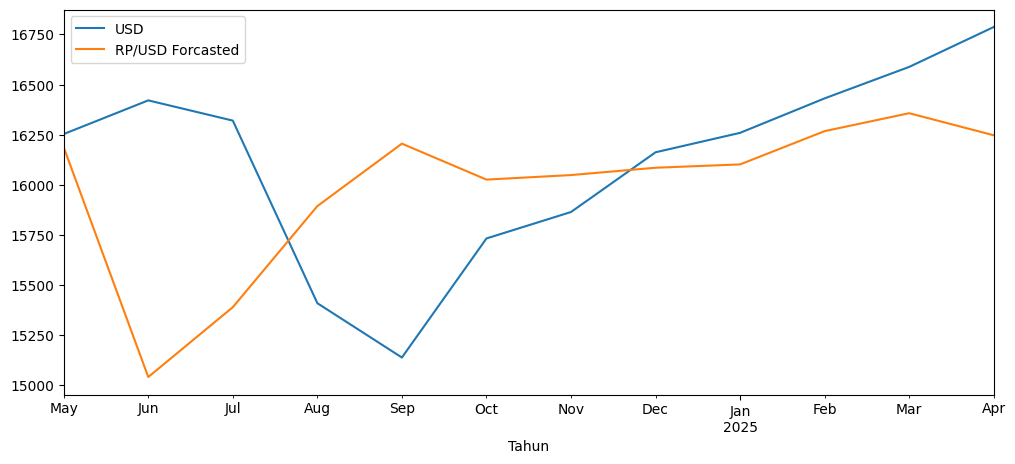

In [45]:
test_original['USD'].plot(figsize=(12,5),legend=True)
inverted['RP/USD Forcasted'].plot(legend=True)

<Axes: xlabel='Tahun'>

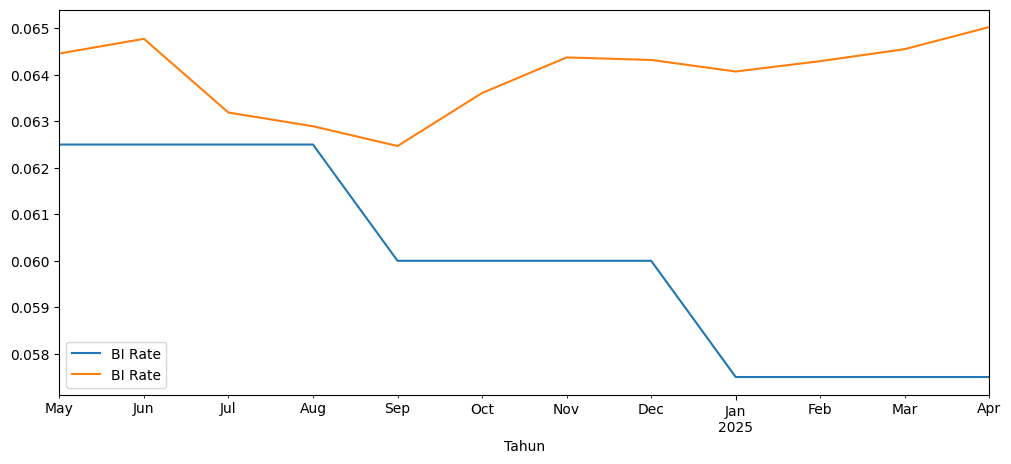

In [185]:
test_original['BI Rate'].plot(figsize=(12,5),legend=True)
inverted['BI Rate'].plot(legend=True)